In [1]:
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("StudentsPerformance.csv")

In [3]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [4]:
# get all the columns that include 'object'
categorical_cols = df.select_dtypes(include='object').columns

In [5]:
categorical_cols

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course'],
      dtype='object')

In [6]:
# show all the unique columns in the dataset

for i in categorical_cols:
    print(df[i].unique())

['female' 'male']
['group B' 'group C' 'group A' 'group D' 'group E']
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
['standard' 'free/reduced']
['none' 'completed']


In [7]:
# check for the null values in the dataset
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [8]:
import seaborn as sns 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gender', ylabel='count'>

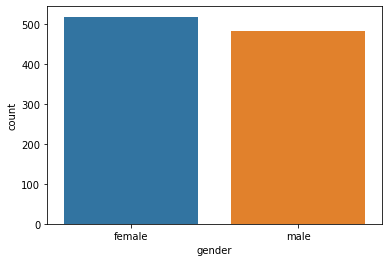

In [9]:
sns.countplot(df['gender'])

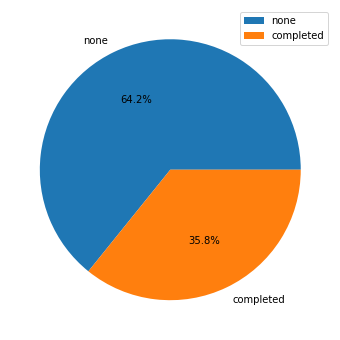

In [10]:
# show the number of students who take preparatory classes
count_test = df['test preparation course'].value_counts()
labels = df['test preparation course'].value_counts().index
plt.figure(figsize= (6,6))
plt.pie(count_test, labels=labels,autopct='%1.1f%%')
plt.legend(labels)
plt.show()


In [11]:
# create average score from the (math score, reading score, writing score) fields 

df['average_score']=(df['math score']+df['reading score']+df['writing score'])/3

In [12]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,65.000000
998,female,group D,some college,standard,completed,68,78,77,74.333333


<AxesSubplot:xlabel='average_score', ylabel='math score'>

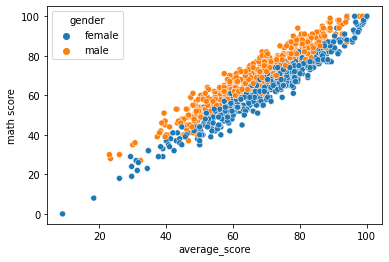

In [13]:
# show plot of student performance in (math) based on their gender

sns.scatterplot(x=df['average_score'],y=df['math score'],hue=df['gender'])

In [14]:
# 1 for male and 0 for female in (gender)

gender = {
    'male' :1,
    'female':0
}

In [15]:
# identify results in race column by numbers
race = {
    'group A':0,
    'group B':1,
    'group C':2,
    'group D':3,
    'group E':4,
}

In [16]:
# mapping (gender, race) columns 

df['gender']=df['gender'].map(gender)
df['race/ethnicity']=df['race/ethnicity'].map(race)

In [17]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average_score
0,0,1,bachelor's degree,standard,none,72,72,74,72.666667
1,0,2,some college,standard,completed,69,90,88,82.333333
2,0,1,master's degree,standard,none,90,95,93,92.666667
3,1,0,associate's degree,free/reduced,none,47,57,44,49.333333
4,1,2,some college,standard,none,76,78,75,76.333333
...,...,...,...,...,...,...,...,...,...
995,0,4,master's degree,standard,completed,88,99,95,94.000000
996,1,2,high school,free/reduced,none,62,55,55,57.333333
997,0,2,high school,free/reduced,completed,59,71,65,65.000000
998,0,3,some college,standard,completed,68,78,77,74.333333


In [18]:
# identify results in level column by numbers

level = {
    "bachelor's degree":0,
    "some college":1,
    "master's degree":2,
    "associate's degree":3,
    "high school":4,
    "some high school":5    
}

In [19]:
# maping results of (parent level of education)

df['parental level of education']=df['parental level of education'].map(level)

In [20]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average_score
0,0,1,0,standard,none,72,72,74,72.666667
1,0,2,1,standard,completed,69,90,88,82.333333
2,0,1,2,standard,none,90,95,93,92.666667
3,1,0,3,free/reduced,none,47,57,44,49.333333
4,1,2,1,standard,none,76,78,75,76.333333
...,...,...,...,...,...,...,...,...,...
995,0,4,2,standard,completed,88,99,95,94.000000
996,1,2,4,free/reduced,none,62,55,55,57.333333
997,0,2,4,free/reduced,completed,59,71,65,65.000000
998,0,3,1,standard,completed,68,78,77,74.333333


In [21]:
df = pd.get_dummies(df,drop_first=True)

In [22]:
df

,gender,race/ethnicity,parental level of education,math score,reading score,writing score,average_score,lunch_standard,test preparation course_none
0,0,1,0,72,72,74,72.666667,1,1
1,0,2,1,69,90,88,82.333333,1,0
2,0,1,2,90,95,93,92.666667,1,1
3,1,0,3,47,57,44,49.333333,0,1
4,1,2,1,76,78,75,76.333333,1,1
...,...,...,...,...,...,...,...,...,...
995,0,4,2,88,99,95,94.000000,1,0
996,1,2,4,62,55,55,57.333333,0,1
997,0,2,4,59,71,65,65.000000,0,0
998,0,3,1,68,78,77,74.333333,1,0


In [23]:
# drop (average score) from (x)

x = df.drop(columns='average_score').values

In [24]:
x

array([[ 0,  1,  0, ..., 74,  1,  1],
       [ 0,  2,  1, ..., 88,  1,  0],
       [ 0,  1,  2, ..., 93,  1,  1],
       ...,
       [ 0,  2,  4, ..., 65,  0,  0],
       [ 0,  3,  1, ..., 77,  1,  0],
       [ 0,  3,  1, ..., 86,  0,  1]], dtype=int64)

In [25]:
# showing (average score) values in y axis 
y = df['average_score'].values


In [26]:
y


array([ 72.66666667,  82.33333333,  92.66666667,  49.33333333,
        76.33333333,  77.33333333,  91.66666667,  40.66666667,
        65.        ,  49.33333333,  54.66666667,  45.        ,
        73.        ,  73.33333333,  53.66666667,  74.        ,
        87.66666667,  26.        ,  44.66666667,  57.66666667,
        66.        ,  70.        ,  50.33333333,  71.66666667,
        75.        ,  73.        ,  59.33333333,  70.33333333,
        68.33333333,  69.        ,  72.33333333,  63.        ,
        64.33333333,  40.        ,  88.66666667,  80.33333333,
        79.33333333,  57.66666667,  84.33333333,  56.66666667,
        56.66666667,  66.33333333,  58.66666667,  63.33333333,
        53.33333333,  58.66666667,  60.66666667,  71.        ,
        69.        ,  82.66666667,  52.        ,  71.33333333,
        46.33333333,  80.33333333,  80.66666667,  39.        ,
        84.33333333,  52.        ,  58.33333333,   9.        ,
        75.        ,  37.33333333,  59.33333333,  73.33

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
# split the data with (train and test split)

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [29]:
# using (RandomForst Regressor) to improve the predictive accuracy and control over-fitting

from sklearn.ensemble import RandomForestRegressor

In [30]:
model=RandomForestRegressor()

In [31]:
model.fit(x_train,y_train)

RandomForestRegressor()

In [32]:
# get predictions on x_test

predictions=model.predict(x_test)

In [33]:
predictions

array([86.85666667, 63.11666667, 74.56333333, 75.28      , 81.56666667,
       77.81      , 67.31333333, 59.05666667, 77.56333333, 49.38      ,
       47.51      , 28.19333333, 75.62      , 58.73      , 83.63333333,
       74.28      , 49.31333333, 48.06      , 52.72333333, 61.25333333,
       73.02666667, 49.79      , 65.68      , 44.32      , 78.85666667,
       76.94      , 71.75333333, 49.83333333, 42.99666667, 55.69333333,
       59.87      , 67.28333333, 60.38      , 73.20333333, 77.18666667,
       51.61333333, 75.78333333, 74.15      , 75.27      , 22.37333333,
       77.73333333, 64.41333333, 65.88      , 60.85333333, 85.37666667,
       64.50666667, 71.11      , 31.15666667, 86.12333333, 79.19      ,
       71.55666667, 71.69333333, 78.10666667, 53.35666667, 71.21333333,
       72.24666667, 82.19      , 54.97333333, 82.78333333, 88.93666667,
       43.41333333, 80.60333333, 78.65333333, 61.22333333, 87.1       ,
       73.21666667, 65.69666667, 54.62333333, 64.1       , 88.55

In [34]:
# get accuracy score
from sklearn.metrics import r2_score

In [35]:
print(r2_score(predictions,y_test))

0.993957423257767
